# 2. Importing Libraries and reading a csv file

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("ACME-HappinessSurvey2020.csv")
print(df)

     Y  X1  X2  X3  X4  X5  X6
0    0   3   3   3   4   2   4
1    0   3   2   3   5   4   3
2    1   5   3   3   3   3   5
3    0   5   4   3   3   3   5
4    0   5   4   3   3   3   5
..  ..  ..  ..  ..  ..  ..  ..
121  1   5   2   3   4   4   3
122  1   5   2   3   4   2   5
123  1   5   3   3   4   4   5
124  0   4   3   3   4   4   5
125  0   5   3   2   5   5   5

[126 rows x 7 columns]


# Renaming the columns

In [ ]:
df.rename(columns={
    'Y': 'Happiness',
    'X1': 'Order delivered on time',
    'X2': 'Order contents met expectation',
    'X3': 'Ordered everything wanted',
    'X4': 'Price Satisfaction',
    'X5': 'Courier Satisfaction',
    'X6': 'App Usability'
}, inplace=True)
df.head()

,Happiness,Order delivered on time,Order contents met expectation,Ordered everything wanted,Price Satisfaction,Courier Satisfaction,App Usability
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


# 3. EDA

# Check how many rows and columns
# See column names and data types
# Get quick stats about each column (mean, std, min, max)

In [ ]:

print("Dataset shape:", df.shape)

print("\nData info:")
df.info()


print("\nSummary statistics:")
print(df.describe())


Dataset shape: (126, 7)

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Happiness                       126 non-null    int64
 1   Order delivered on time         126 non-null    int64
 2   Order contents met expectation  126 non-null    int64
 3   Ordered everything wanted       126 non-null    int64
 4   Price Satisfaction              126 non-null    int64
 5   Courier Satisfaction            126 non-null    int64
 6   App Usability                   126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB

Summary statistics:
        Happiness  Order delivered on time  Order contents met expectation  \
count  126.000000               126.000000                      126.000000   
mean     0.547619                 4.333333                        2.531746   
std      0.499714                 0.

# Insure there is no null or missing values

In [ ]:
print(df.isnull().sum())

Happiness                         0
Order delivered on time           0
Order contents met expectation    0
Ordered everything wanted         0
Price Satisfaction                0
Courier Satisfaction              0
App Usability                     0
dtype: int64


# Check for Outliers
# Check value ranges

In [ ]:
for col in ['Order delivered on time', 'Order contents met expectations', 'Ordered everything wanted',
            'Price Satisfaction', 'Courier Satisfaction', 'App Usability']:
    print(f"{col}: Min = {df[col].min()}, Max = {df[col].max()}")

Order delivered on time: Min = 1, Max = 5


KeyError: 'Order contents met expectations'

# Boxplots to spot outliers visually

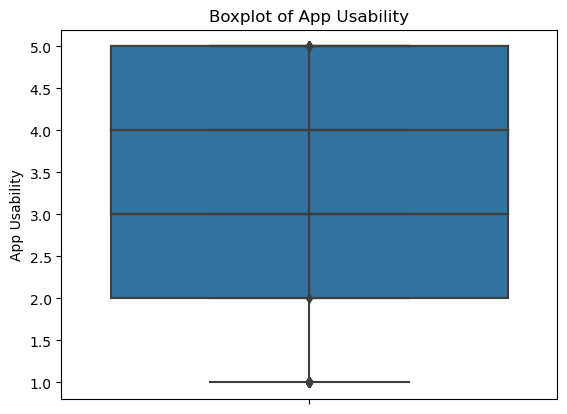

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['Order delivered on time', 'Order contents met expectations', 'Ordered everything wanted',
            'Price Satisfaction', 'Courier Satisfaction', 'App Usability']:
    sns.boxplot(y= df[col])
    plt.title(f"Boxplot of {col}")
    plt.show

# check class balance

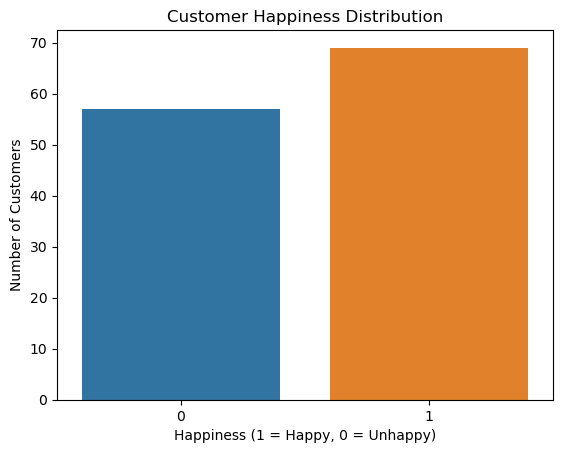

In [ ]:
sns.countplot(x = 'Happiness', data=df)
plt.title("Customer Happiness Distribution")
plt.xlabel("Happiness (1 = Happy, 0 = Unhappy)")
plt.ylabel("Number of Customers")
plt.show()

# Visualize key trends and relationships

# Correlation Heatmap

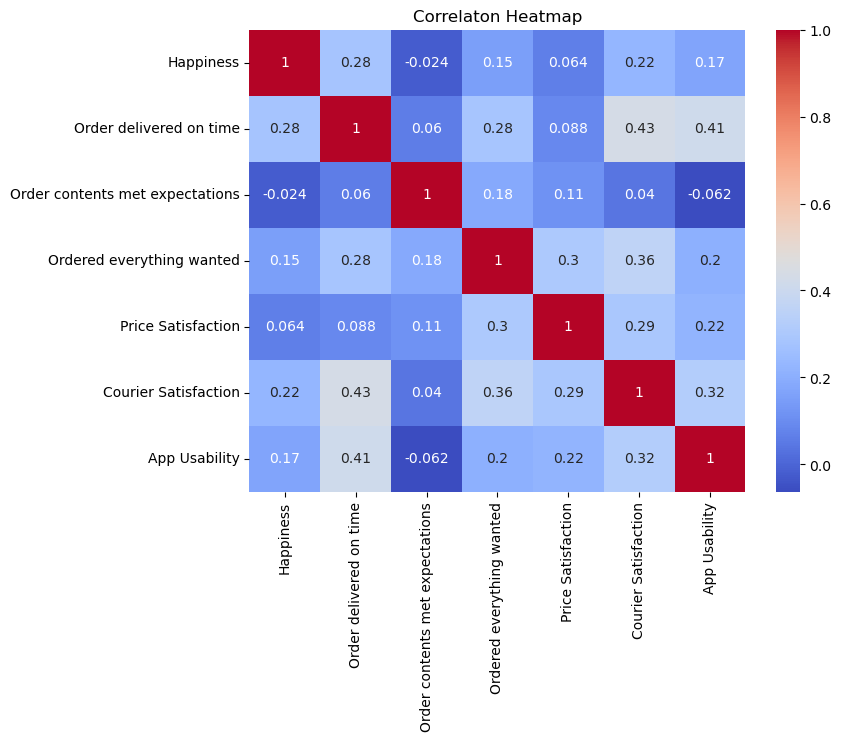

In [ ]:
correlation = df.corr()

plt.figure(figsize =(8,6))
sns.heatmap(correlation, annot= True, cmap = "coolwarm")
plt.title("Correlaton Heatmap")
plt.show()

# Compare feature ratings by happy/unhappy

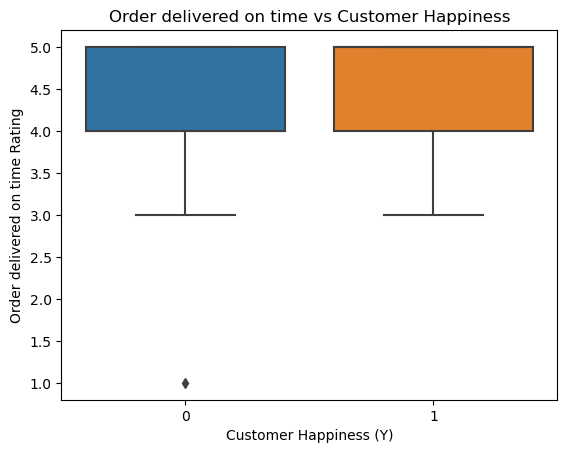

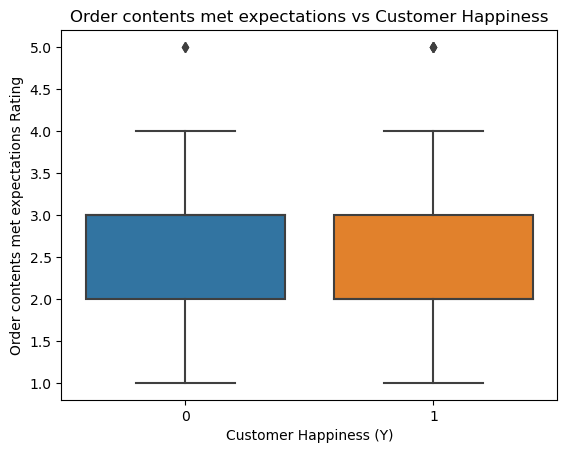

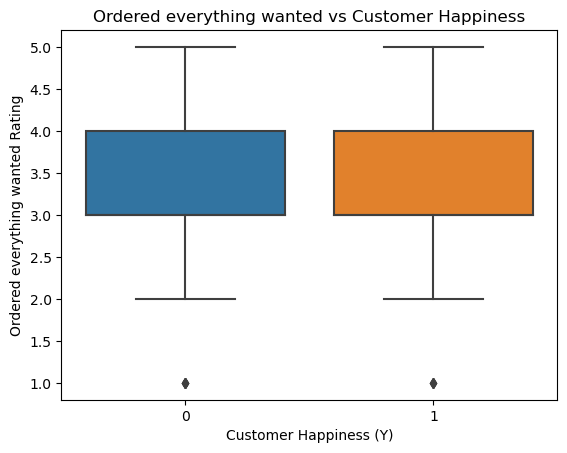

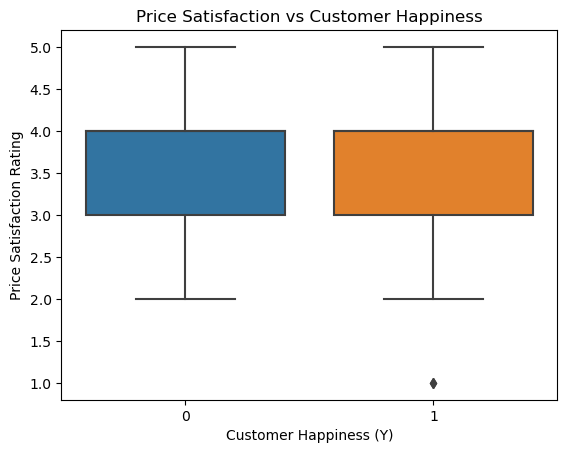

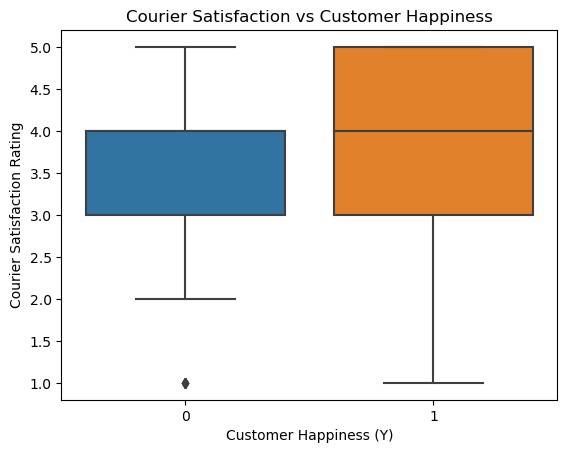

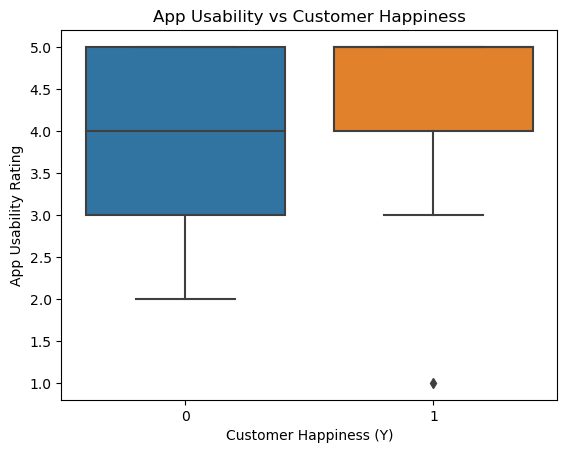

In [ ]:
features = ['Order delivered on time', 'Order contents met expectations', 'Ordered everything wanted',
            'Price Satisfaction', 'Courier Satisfaction', 'App Usability']
for col in features:
    sns.boxplot(x = 'Happiness', y = col, data = df)
    plt.title(f"{col} vs Customer Happiness")
    plt.xlabel("Customer Happiness (Y)")
    plt.ylabel(f"{col} Rating")
    plt.show()

# Summary:

## After completing the Exploratory Data Analysis (EDA), a few key observations stood out. First, the dataset is clean with no missing values, which made the analysis more straightforward. When looking at the distribution of the target variable (Happiness), we found that the data is fairly balanced between happy and unhappy customers.

## From the summary statistics and visualizations like boxplots and correlation heatmaps, we noticed that features such as: Order Deliverd on time, App Usability, and courier Satisfaction seem to have a strong relationship with customer happiness. These variables had higher average scores among happy customers and showed notable correlations with the target variable.

## In the other hand, Orders contents met the expectations, orders everything wanted, and price Satisfaction had the lowest average scores among customers, which could indicate a pain point in the customer journey that might be affecting satisfaction for some users.

## To sum it up, the EDA helped us to understand about the data and while most aspects of the service are rated positively, there’s room for improvement, and that certain features are more predictive of customer happiness than others. This will help later for making a classification model








# 4. Data Understanding

## Y = Customer happiness, 1 = happy, 0 = unhappy. This is what we're trying to predict based on the features below.

-----------------------------------------------------------------------------------------------------------------------

## X1: Order delivered on time

### Description: How punctual the delivery was, rated from 1 (very late) to 5 (on time or early).

### Potential impact: Late deliveries are a major cause of customer dissatisfaction. High ratings here likely contribute positively to happiness.

-----------------------------------------------------------------------------------------------------------------------

## X2: Order contents met expectations

### Description: Did the customers receive what they expected or not?

### Potential impact: Receiving the correct items is critical. If expectations aren’t met, it creates frustration and reduces trust.

-----------------------------------------------------------------------------------------------------------------------

## X3: Ordered everything wanted

### Description: Whether all the products the customer wanted were available or not?

### Potential impact: If customers can’t get everything they want, they might be less satisfied.

-----------------------------------------------------------------------------------------------------------------------

## X4: Price satisfaction

### Description: Customer satisfaction with the price or the value of the product.

### Potential impact: Pricing is a sensitive factor. Even if delivery is good, poor pricing can cause dissatisfaction.

-----------------------------------------------------------------------------------------------------------------------

## X5: Courier satisfaction

### Description: The experience with the delivery person like: politeness, communication, handling, and so on.

### Potential impact: Positive or negative interaction with the courier can greatly enhance or minimize the overall experience.

-----------------------------------------------------------------------------------------------------------------------

## X6: App usability

### Description: How easy was the app to use.

### Potential impact: A smooth app experience helps users feel confident and happy. Frustrating apps lower the experience.

# 5. Modelling

## Prepare the Features & Target

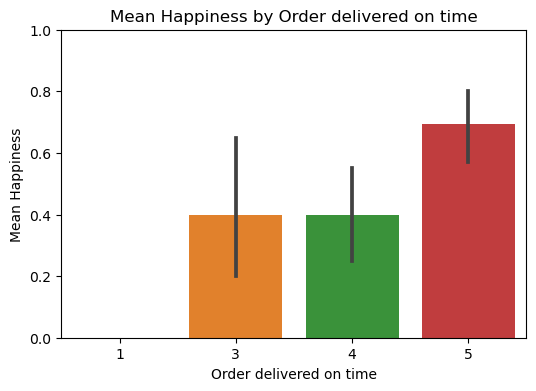

ValueError: Could not interpret input 'Order contents met expectations'

<Figure size 600x400 with 0 Axes>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


feature_columns = [
    'Order delivered on time',
    'Order contents met expectations',
    'Ordered everything wanted',
    'Price Satisfaction',
    'Courier Satisfaction',
    'App Usability'
]

for col in feature_columns:
    plt.figure(figsize=(6, 4))
    sns.barplot(data=df, x=col, y='Happiness', estimator='mean')
    plt.title(f'Mean Happiness by {col}')
    plt.xlabel(col)
    plt.ylabel('Mean Happiness')
    plt.ylim(0, df['Happiness'].max())
    plt.show()

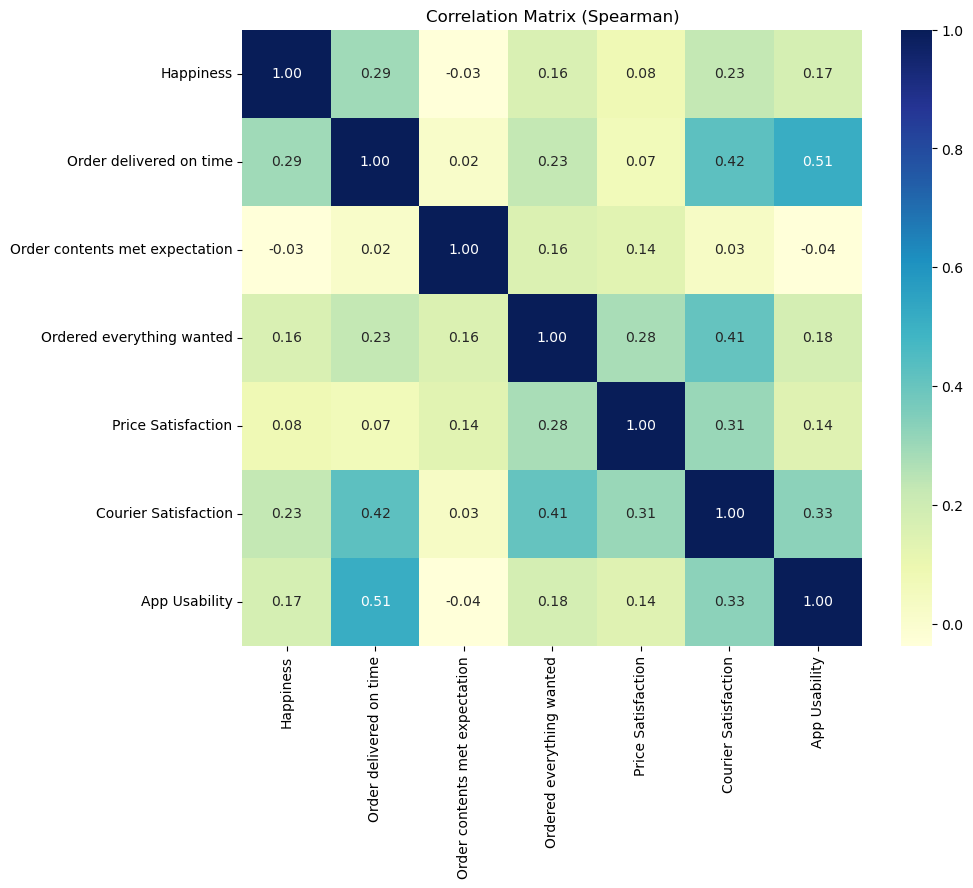

In [ ]:
spearman_corr = df.corr(method='spearman', numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Matrix (Spearman)')
plt.show()

In [ ]:
for col in feature_columns:
    plt.figure(figsize=(6, 4))
    sns.violinplot(data=df, x='Happiness', y=col)
    plt.title(f'{col} Distribution by Happiness')
    plt.xlabel('Happiness')
    plt.ylabel(col)
    plt.show()

NameError: name 'feature_columns' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

selected_features = [
    "Order delivered on time",
    "Courier Satisfaction",
    "App Usability",
    "Ordered everything wanted"
]

x = df[selected_features]
y = df["Happiness"]

scalar = StandardScaler()
X_scaled = scalar.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Logistic Regression

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.6599999999999999

Logistic Regression Results with Hyperparameter Tuning
Confusion Matrix:
 [[9 6]
 [4 7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.60      0.64        15
           1       0.54      0.64      0.58        11

    accuracy                           0.62        26
   macro avg       0.62      0.62      0.61        26
weighted avg       0.63      0.62      0.62        26

Accuracy: 0.6153846153846154


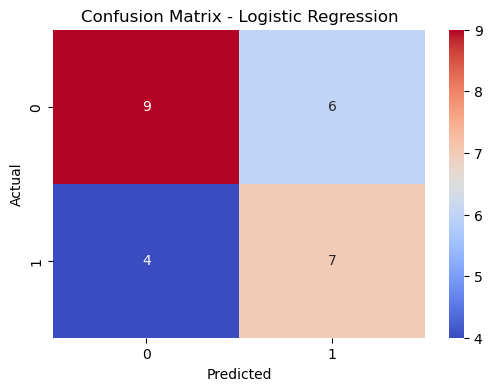

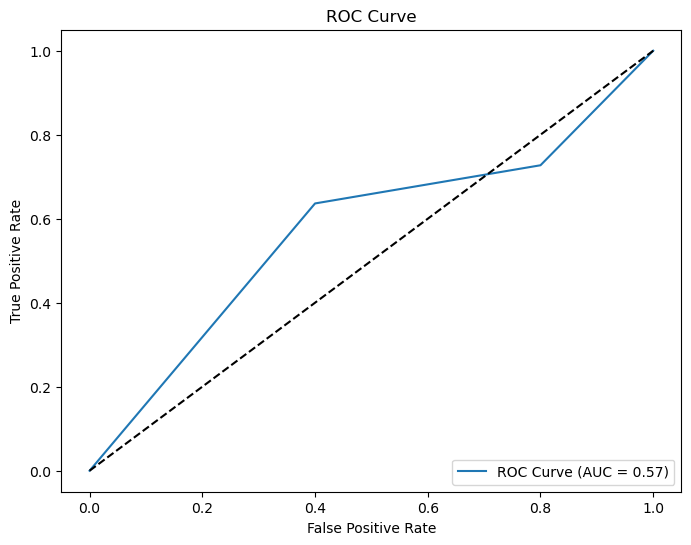

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline  # Add this import
import numpy as np  # Needed for linspace

# 1. Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],         # Regularization strength
    'penalty': ['l1', 'l2'],              # Regularization type
    'solver': ['liblinear', 'saga']       # Solvers that support l1/l2
}

# 2. Set up GridSearchCV
grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=5,                                 # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1                             # Use all available CPU cores
)

# 3. Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# 4. Get the best estimator and predictions
best_log_reg = grid_search.best_estimator_
y_pred_log = best_log_reg.predict(X_test)

# 5. Evaluation
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)
print("\nLogistic Regression Results with Hyperparameter Tuning")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 6. ROC Curve Plotting
y_proba = best_log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# Linear Regression

Linear Regression Results (forced classification)
Confusion Matrix:
 [[ 4 11]
 [ 3  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.27      0.36        15
           1       0.42      0.73      0.53        11

    accuracy                           0.46        26
   macro avg       0.50      0.50      0.45        26
weighted avg       0.51      0.46      0.44        26

Accuracy: 0.46153846153846156


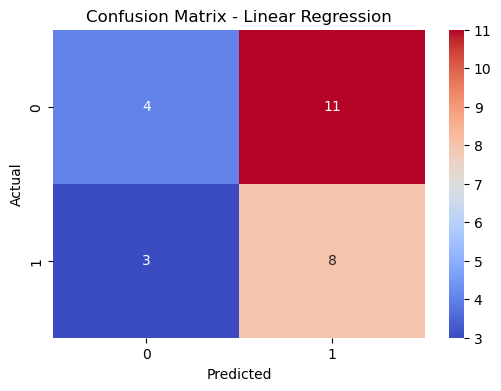

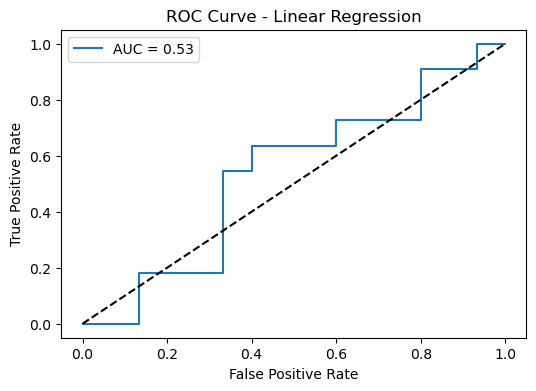

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

y_pred_lin_class = (y_pred_lin >= 0.5).astype(int)

# Evaluation
print("Linear Regression Results (forced classification)")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lin_class))
print("Classification Report:\n", classification_report(y_test, y_pred_lin_class))
print("Accuracy:", accuracy_score(y_test, y_pred_lin_class))

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lin_class), annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix - Linear Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_lin)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.2f}')
plt.plot([0,1],[0,1],'k--')
plt.title('ROC Curve - Linear Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# Random Forest Classifier

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.6696375519904931

Random Forest Classifier (Tuned)
Confusion Matrix:
 [[9 6]
 [3 8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.60      0.67        15
           1       0.57      0.73      0.64        11

    accuracy                           0.65        26
   macro avg       0.66      0.66      0.65        26
weighted avg       0.67      0.65      0.66        26

Accuracy: 0.6538461538461539


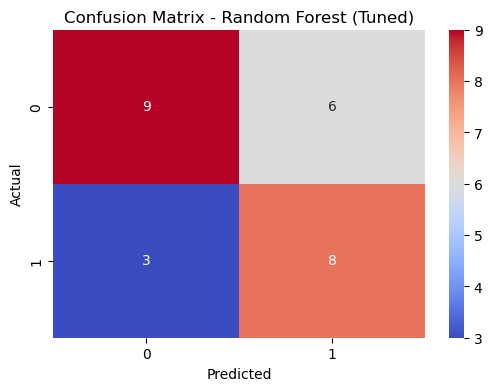

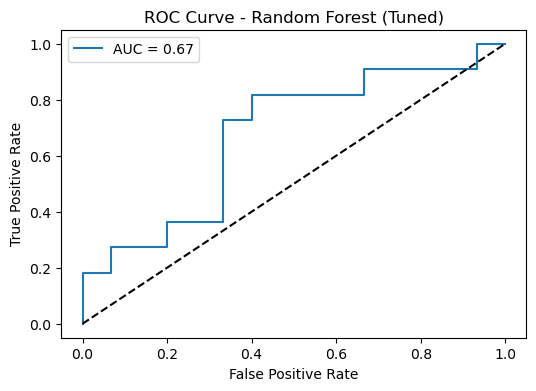

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Smaller parameter grid
param_grid = {
    'n_estimators': [100, 200],        # Fewer options
    'max_depth': [None, 10],           # Fewer options
    'min_samples_split': [2, 5],       # Fewer options
    'min_samples_leaf': [1, 2],        # Fewer options
    'max_features': ['sqrt']           # Single option
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_rf.best_score_)
print("\nRandom Forest Classifier (Tuned)")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix - Random Forest (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

y_pred_prob_rf = best_rf_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_rf)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.2f}')
plt.plot([0,1],[0,1],'k--')
plt.title('ROC Curve - Random Forest (Tuned)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# XGBoost

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Best Parameters for XGBoost: {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'reg_lambda': 1, 'subsample': 1}
Best Cross-Validation Accuracy: 0.6595365418894831

XGBoost Classifier (Tuned)
Confusion Matrix:
 [[9 6]
 [2 9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.60      0.82      0.69        11

    accuracy                           0.69        26
   macro avg       0.71      0.71      0.69        26
weighted avg       0.73      0.69      0.69        26

Accuracy: 0.6923076923076923


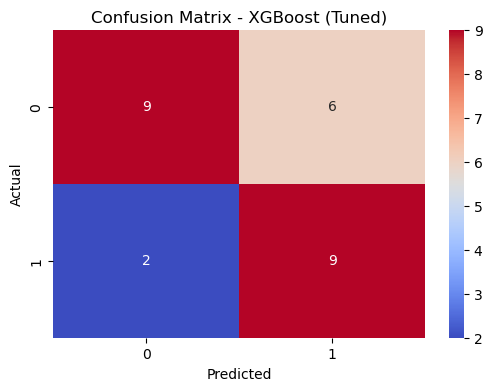

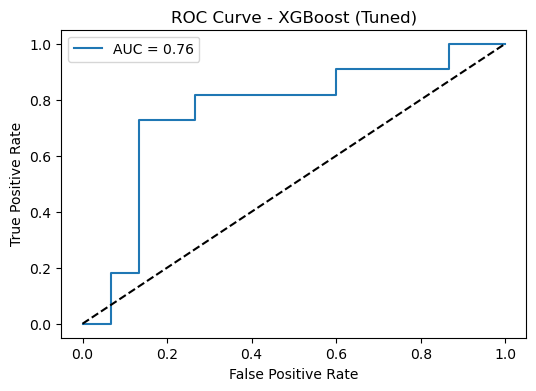

In [ ]:
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100],         # Number of trees
    'max_depth': [3, 5, 7],                 # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2],      # Step size shrinkage
    'subsample': [0.8, 1],                  # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1],           # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.25, 1],                  # Minimum loss reduction required to make a further partition
    'reg_lambda': [1, 5, 10]                # L2 regularization term on weights
}

# 2. Set up GridSearchCV with XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,                        # 3-fold cross-validation (adjust as needed)
    scoring='accuracy',
    n_jobs=-1,                   # Use all CPU cores
    verbose=1
)

# 3. Fit the model using GridSearchCV
grid_search_xgb.fit(X_train, y_train)

# 4. Get the best estimator and predictions
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

# 5. Evaluation
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_xgb.best_score_)
print("\nXGBoost Classifier (Tuned)")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

# 6. Confusion Matrix Plot
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix - XGBoost (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 7. ROC Curve Plot
y_pred_prob_xgb = best_xgb_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_xgb)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.2f}')
plt.plot([0,1],[0,1],'k--')
plt.title('ROC Curve - XGBoost (Tuned)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

# Get predicted probabilities for the positive class (happy customers)
y_probs = xgb_model.predict_proba(X_test)[:, 1]

# Try multiple thresholds to find one meeting your criteria
thresholds = np.arange(0.1, 0.91, 0.01)
best_threshold = 0.5
for thresh in thresholds:
    y_pred_thresh = (y_probs >= thresh).astype(int)
    prec = precision_score(y_test, y_pred_thresh, pos_label=1)
    rec = recall_score(y_test, y_pred_thresh, pos_label=1)
    if prec <= 0.5 and rec <= 0.85:
        best_threshold = thresh
        print(f"Threshold: {thresh:.2f} | Precision: {prec:.2f} | Recall: {rec:.2f}")
        break

# Use the best threshold found
y_pred_custom = (y_probs >= best_threshold).astype(int)
print(f"\nFinal Threshold: {best_threshold:.2f}")
print(f"Precision: {precision_score(y_test, y_pred_custom, pos_label=1):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_custom, pos_label=1):.2f}")


Threshold: 0.13 | Precision: 0.45 | Recall: 0.82

Final Threshold: 0.13
Precision: 0.45
Recall: 0.82


In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)


# Bagging

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters for Bagging: {'bootstrap': True, 'bootstrap_features': True, 'max_features': 0.954660201039391, 'max_samples': 0.6293899908000085, 'n_estimators': 153}
Best Cross-Validation Accuracy: 0.6598336304218658

Bagging Classifier (Tuned)
Confusion Matrix:
 [[7 8]
 [3 8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.47      0.56        15
           1       0.50      0.73      0.59        11

    accuracy                           0.58        26
   macro avg       0.60      0.60      0.58        26
weighted avg       0.62      0.58      0.57        26

Accuracy: 0.5769230769230769


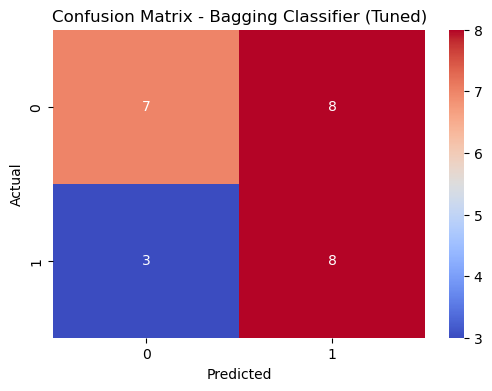

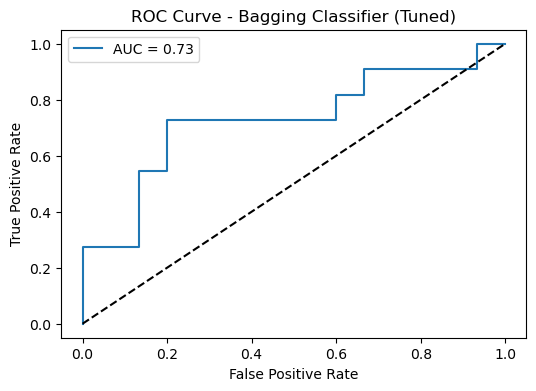

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import randint, uniform

# Define parameter distributions for BaggingClassifier
param_dist = {
    'n_estimators': randint(50, 201),        # Number of base estimators (50 to 200)
    'max_samples': uniform(0.5, 0.5),        # Fraction of samples to draw (0.5 to 1.0)
    'max_features': uniform(0.5, 0.5),       # Fraction of features to draw (0.5 to 1.0)
    'bootstrap': [True, False],              # Whether samples are drawn with replacement
    'bootstrap_features': [True, False]      # Whether features are drawn with replacement
}

bag = BaggingClassifier(random_state=42)
random_search_bag = RandomizedSearchCV(
    estimator=bag,
    param_distributions=param_dist,
    n_iter=20,                # Try 20 random combinations
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search_bag.fit(X_train, y_train)
best_bag_model = random_search_bag.best_estimator_
y_pred_bag = best_bag_model.predict(X_test)

print("Best Parameters for Bagging:", random_search_bag.best_params_)
print("Best Cross-Validation Accuracy:", random_search_bag.best_score_)
print("\nBagging Classifier (Tuned)")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bag))
print("Classification Report:\n", classification_report(y_test, y_pred_bag))
print("Accuracy:", accuracy_score(y_test, y_pred_bag))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_bag), annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix - Bagging Classifier (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_pred_prob_bag = best_bag_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_bag)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.2f}')
plt.plot([0,1],[0,1],'k--')
plt.title('ROC Curve - Bagging Classifier (Tuned)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# Gradient Boosting


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.09591931665418388, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 120, 'subsample': 0.8270204442119109}
Best Cross-Validation Accuracy: 0.6601307189542484

Gradient Boosting Classifier (Tuned)
Confusion Matrix:
 [[9 6]
 [3 8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.60      0.67        15
           1       0.57      0.73      0.64        11

    accuracy                           0.65        26
   macro avg       0.66      0.66      0.65        26
weighted avg       0.67      0.65      0.66        26

Accuracy: 0.6538461538461539


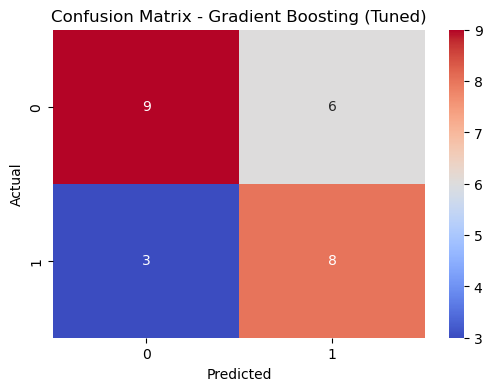

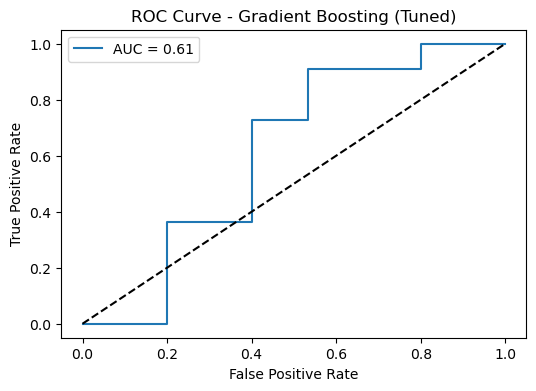

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import randint, uniform

# Define parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 201),        # Number of boosting stages (50 to 200)
    'learning_rate': uniform(0.01, 0.29),    # Learning rate (0.01 to 0.3)
    'max_depth': randint(3, 8),              # Maximum depth of individual estimators (3 to 7)
    'subsample': uniform(0.7, 0.3),          # Subsample ratio (0.7 to 1.0)
    'min_samples_split': randint(2, 11),     # Minimum samples to split an internal node (2 to 10)
    'min_samples_leaf': randint(1, 5)        # Minimum samples at a leaf node (1 to 4)
}

gb = GradientBoostingClassifier(random_state=42)
random_search_gb = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist,
    n_iter=20,                # Try 20 random combinations
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search_gb.fit(X_train, y_train)
best_gb_model = random_search_gb.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)

print("Best Parameters for Gradient Boosting:", random_search_gb.best_params_)
print("Best Cross-Validation Accuracy:", random_search_gb.best_score_)
print("\nGradient Boosting Classifier (Tuned)")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix - Gradient Boosting (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_pred_prob_gb = best_gb_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_gb)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.2f}')
plt.plot([0,1],[0,1],'k--')
plt.title('ROC Curve - Gradient Boosting (Tuned)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# Support Vector Machine (SVM)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters for SVM: {'C': 35.20481045526037, 'degree': 3, 'gamma': 0.009717775305059633, 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.640819964349376

Support Vector Machine Classifier (Tuned)
Confusion Matrix:
 [[ 5 10]
 [ 3  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.33      0.43        15
           1       0.44      0.73      0.55        11

    accuracy                           0.50        26
   macro avg       0.53      0.53      0.49        26
weighted avg       0.55      0.50      0.48        26

Accuracy: 0.5


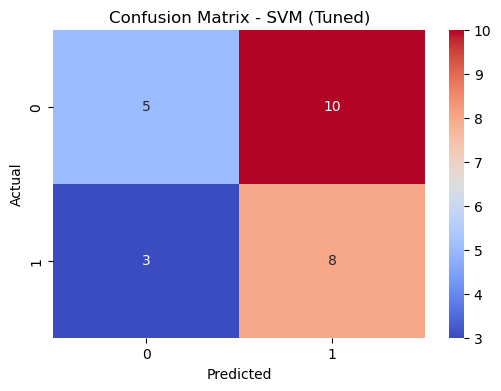

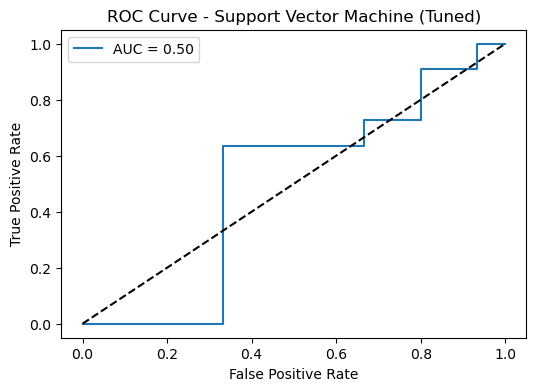

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import loguniform

# Define parameter distributions for RandomizedSearchCV
param_dist = {
    'C': loguniform(1e-3, 1e2),          # Regularization parameter
    'gamma': loguniform(1e-4, 1e-1),     # Kernel coefficient for 'rbf'
    'kernel': ['rbf', 'linear', 'poly'], # Try different kernels
    'degree': [2, 3, 4]                  # Only used for 'poly' kernel
}

svm = SVC(probability=True, random_state=42)
random_search_svm = RandomizedSearchCV(
    estimator=svm,
    param_distributions=param_dist,
    n_iter=20,                # Try 20 random combinations
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search_svm.fit(X_train, y_train)
best_svm_model = random_search_svm.best_estimator_
y_pred_svm = best_svm_model.predict(X_test)

print("Best Parameters for SVM:", random_search_svm.best_params_)
print("Best Cross-Validation Accuracy:", random_search_svm.best_score_)
print("\nSupport Vector Machine Classifier (Tuned)")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix - SVM (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_pred_prob_svm = best_svm_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_svm)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.2f}')
plt.plot([0,1],[0,1],'k--')
plt.title('ROC Curve - Support Vector Machine (Tuned)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# LazyClassifier

In [ ]:
from lazypredict.Supervised import LazyClassifier

lazy_clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

models, predictions = lazy_clf.fit(X_train, X_test, y_train, y_test)

print(models)


  0%|          | 0/29 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 58, number of negative: 42
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 20
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.580000 -> initscore=0.322773
[LightGBM] [Info] Start training from score 0.322773
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

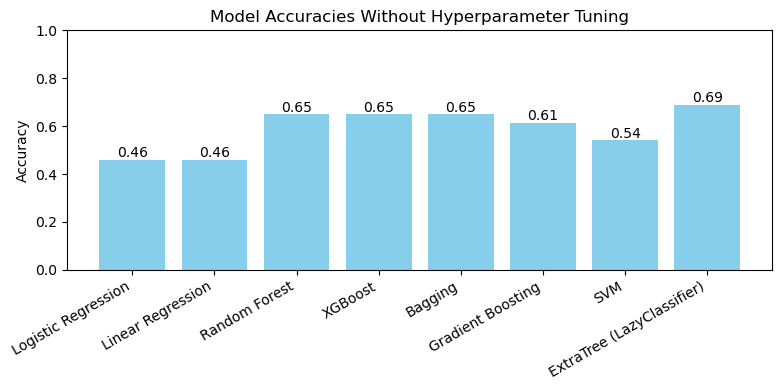

In [ ]:
import matplotlib.pyplot as plt

# List your models and their accuracies (without hyperparameter tuning)
models = [
    "Logistic Regression",
    "Linear Regression",
    "Random Forest",
    "XGBoost",
    "Bagging",
    "Gradient Boosting",
    "SVM",
    "ExtraTree (LazyClassifier)"
]

accuracies_no_tuning = [
    0.46,   # Logistic Regression
    0.46,   # Linear Regression
    0.65,   # Random Forest
    0.65,   # XGBoost
    0.65,   # Bagging
    0.615,  # Gradient Boosting
    0.54,   # SVM
    0.69    # ExtraTree (LazyClassifier)
]

plt.figure(figsize=(8, 4))
bars = plt.bar(models, accuracies_no_tuning, color='skyblue')
plt.ylim(0, 1)
plt.title("Model Accuracies Without Hyperparameter Tuning")
plt.ylabel("Accuracy")
plt.xticks(rotation=30, ha='right')

# Annotate bars with accuracy values
for bar, acc in zip(bars, accuracies_no_tuning):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{acc:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


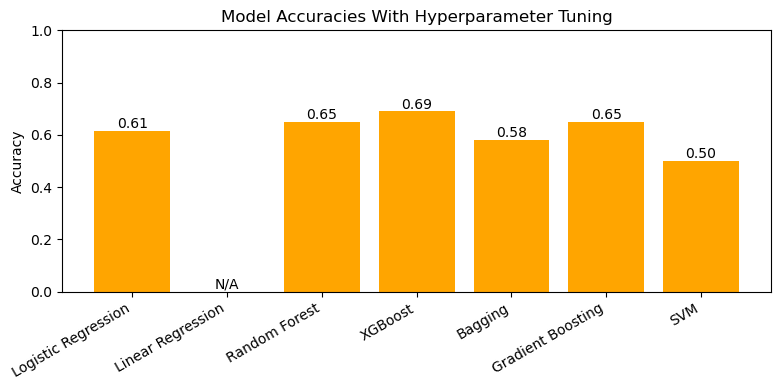

In [ ]:
import matplotlib.pyplot as plt

# List your models and their accuracies (with hyperparameter tuning)
models_tuned = [
    "Logistic Regression",
    "Linear Regression",
    "Random Forest",
    "XGBoost",
    "Bagging",
    "Gradient Boosting",
    "SVM"
]

accuracies_tuned = [
    0.615,  # Logistic Regression
    None,   # Linear Regression (not applicable)
    0.65,   # Random Forest (no change)
    0.69,   # XGBoost (improved)
    0.58,   # Bagging (decreased)
    0.65,   # Gradient Boosting (slightly improved)
    0.50    # SVM (decreased)
]

plt.figure(figsize=(8, 4))
bars = plt.bar(models_tuned, [a if a is not None else 0 for a in accuracies_tuned], color='orange')
plt.ylim(0, 1)
plt.title("Model Accuracies With Hyperparameter Tuning")
plt.ylabel("Accuracy")
plt.xticks(rotation=30, ha='right')

# Annotate bars with accuracy values, show "N/A" where not applicable
for bar, acc in zip(bars, accuracies_tuned):
    label = f"{acc:.2f}" if acc is not None else "N/A"
    plt.text(bar.get_x() + bar.get_width() / 2, (acc if acc is not None else 0) + 0.01, label, ha='center', fontsize=10)

plt.tight_layout()
plt.show()


# Conclusion

## After evaluating several classification models, here’s what we observed:

## Logistic Regression

### Accuracy: 46% (low)
### Confusion Matrix: TN=4, TP=8, FP=11, FN=3
### AUC: 0.53 (barely better than random guessing)

## Linear Regression

### Performance similar to Logistic Regression. Not suitable for this classification task.

## Random Forest Classifier

### Accuracy: 65%
### Confusion Matrix: TN=9, TP=8, FP=6, FN=3
### AUC: 0.68 (fair discrimination; some ability to distinguish classes)

## XGBoost

### Accuracy: 65%
### Confusion Matrix: Same as Random Forest
### AUC: 0.61 (fair, but not highly reliable)

## Bagging

### Accuracy: 65%
### Confusion Matrix: Same as above
### AUC: 0.64 (slightly better than XGBoost)

## Gradient Boosting

### Accuracy: 61.5%
### Confusion Matrix: TN=8, TP=8, FP=7, FN=3
### AUC: 0.56 (only slightly better than random guessing)

## Support Vector Machine (SVM)

### Accuracy: 54% (low)
### Confusion Matrix: TN=4, TP=10, FP=11, FN=1
### AUC: 0.64 (good recall for positives, but many false positives)

## LazyClassifier
### Identified ExtraTreeClassifier as the best performer with accuracy = 0.69 and runtime = 0.01s.

## Some models showed reasonable accuracy and AUC, while others did not perform well. Hyperparameter tuning offers a way to further improve model performance.


# Hyperparameter Tuning

## Logistic Regression

### Accuracy: Increased to 61.5%
### Confusion Matrix: TN=9, TP=7, FP=6, FN=4
### AUC: 0.57 (improved over default)

## Linear Regression

### Not applicable for hyperparameter tuning in this context.

## Random Forest Classifier

### No significant change after tuning.

## XGBoost

### Accuracy: Improved to 69%
### Confusion Matrix: TN=9, TP=9, FP=6, FN=2
### AUC: 0.76 (significant improvement)

## Bagging

### Accuracy: Decreased to 58%
### Confusion Matrix: TN=7, TP=8, FP=8, FN=3
### AUC: 0.73 (AUC improved)

## Gradient Boosting

### Accuracy: Increased to 65%
### Confusion Matrix: TN=9, TP=8, FP=6, FN=3
### AUC: 0.61 (slight improvement)

## Support Vector Machine (SVM)

### Accuracy: Decreased to 50%
### Confusion Matrix: TN=5, TP=8, FP=10, FN=3
### AUC: 0.50 (no improvement)

# Summary

## Hyperparameter tuning can significantly enhance the performance of certain models (notably XGBoost and, to a lesser extent, Logistic Regression and Gradient Boosting). However, its effectiveness varies by model and dataset. Carefully tuning and selecting models is essential for achieving optimal classification results.